In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root, fixed_point
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
# Load Training Data

filename = "/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_TimeCourse_Jun9_23.xlsx"
df_br1 = pd.read_excel(filename, sheet_name="Bioreactor1")
df_br2 = pd.read_excel(filename, sheet_name="Bioreactor2")



# Truncate data to remove initial lag phase
time_cutoff = 18
df_br1_trunc = df_br1[df_br1["BatchTime"] > time_cutoff].copy()
df_br2_trunc = df_br2[df_br2["BatchTime"] > time_cutoff].copy()

df_br1_trunc["BatchTime"] = df_br1_trunc["BatchTime"] - df_br1_trunc["BatchTime"].iloc[0]
df_br2_trunc["BatchTime"] = df_br2_trunc["BatchTime"] - df_br2_trunc["BatchTime"].iloc[0]

# Smooth data using Savitzky-Golay filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html
# Parameters
window_size = 151
poly_order = 3
deriv = 0
df_br1_trunc["GrowthRateSmooth"] = savgol_filter(df_br1_trunc["GrowthRate"], window_size, poly_order, deriv=deriv)
df_br2_trunc["GrowthRateSmooth"] = savgol_filter(df_br2_trunc["GrowthRate"], window_size, poly_order, deriv=deriv)

time_arr_multisetpoint = np.arange(0, df_br1_trunc["BatchTime"].iloc[-1], 0.5)
mu_arr_multisetpoint = np.interp(time_arr_multisetpoint, df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRateSmooth"])
L_arr_multisetpoint = np.interp(time_arr_multisetpoint, df_br1_trunc["BatchTime"], df_br1_trunc["Phase"])

In [3]:
# Load Training Data

filename = "/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_ActDeAct_Mar1_23.xlsx"
df_br1_actdeact = pd.read_excel(filename, sheet_name="Bioreactor1")
df_br2_actdeact = pd.read_excel(filename, sheet_name="Bioreactor2")

# Truncate data to remove initial lag phase
time_cutoff = 18
df_br1_trunc_actdeact = df_br1_actdeact[df_br1_actdeact["BatchTime"] > time_cutoff].copy()
df_br2_trunc_actdeact = df_br2_actdeact[df_br2_actdeact["BatchTime"] > time_cutoff].copy()

df_br1_trunc_actdeact["BatchTime"] = df_br1_trunc_actdeact["BatchTime"] - df_br1_trunc_actdeact["BatchTime"].iloc[0]
df_br2_trunc_actdeact["BatchTime"] = df_br2_trunc_actdeact["BatchTime"] - df_br2_trunc_actdeact["BatchTime"].iloc[0]

# Smooth data using Savitzky-Golay filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html
# Parameters
window_size = 151
poly_order = 3
deriv = 0
df_br1_trunc_actdeact["GrowthRateSmooth"] = savgol_filter(df_br1_trunc_actdeact["GrowthRate"], window_size, poly_order, deriv=deriv)
df_br2_trunc_actdeact["GrowthRateSmooth"] = savgol_filter(df_br2_trunc_actdeact["GrowthRate"], window_size, poly_order, deriv=deriv)

time_arr_actdeact = np.arange(0, df_br1_trunc_actdeact["BatchTime"].iloc[-1], 0.5)
mu_arr_actdeact = np.interp(time_arr_actdeact, df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["GrowthRateSmooth"])
df_br1_trunc_actdeact["Phase"] = df_br1_trunc_actdeact["Phase"].str.extract('_(.+)%_')[0].astype(float)/100
L_arr_actdeact = np.interp(time_arr_actdeact, df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["Phase"])

Text(0.5, 1.0, 'Pulse vs Time')

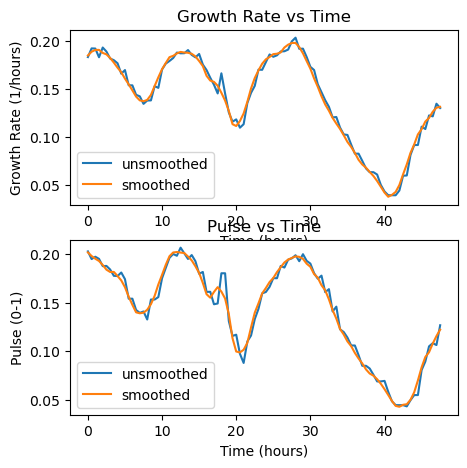

In [4]:
df_pid = pd.read_excel("/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_PID_Feb17_23.xlsx")

time_arr_pid_raw = df_pid["time"].to_numpy() - df_pid["time"].to_numpy()[0]
mu_arr_pid_raw = df_pid["mu"].to_numpy()
pulse_arr_pid_raw = df_pid["u"].to_numpy()

time_arr_pid_raw = time_arr_pid_raw[1:-10]
mu_arr_pid_raw = mu_arr_pid_raw[1:-10]
pulse_arr_pid_raw = pulse_arr_pid_raw[1:-10]

time_arr_pid = np.arange(0, time_arr_pid_raw[-1], 0.5)
mu_arr_pid_unsmooth = np.interp(time_arr_pid, time_arr_pid_raw, mu_arr_pid_raw)
pulse_arr_pid_unsmooth = np.interp(time_arr_pid, time_arr_pid_raw, pulse_arr_pid_raw)


# Smooth data using Savitzky-Golay filter
mu_arr_pid = savgol_filter(mu_arr_pid_unsmooth, 8, 3, deriv=0)
pulse_arr_pid = pulse_arr_pid_unsmooth

df_pid2 = pd.read_excel("/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_PID_Feb17_23_2.xlsx")

time_arr_pid_raw = df_pid2["time"].to_numpy() - df_pid2["time"].to_numpy()[0]
mu_arr_pid2_raw = df_pid2["mu"].to_numpy()
pulse_arr_pid_raw = df_pid2["u"].to_numpy()

time_arr_pid_raw = time_arr_pid_raw[1:-10]
mu_arr_pid2_raw = mu_arr_pid2_raw[1:-10]
pulse_arr_pid_raw = pulse_arr_pid_raw[1:-10]

time_arr_pid2 = np.arange(0, time_arr_pid_raw[-1], 0.5)
mu_arr_pid2_unsmooth = np.interp(time_arr_pid, time_arr_pid_raw, mu_arr_pid2_raw)
pulse_arr_pid2_unsmooth = np.interp(time_arr_pid, time_arr_pid_raw, pulse_arr_pid_raw)

# Smooth data using Savitzky-Golay filter
mu_arr_pid2 = savgol_filter(mu_arr_pid2_unsmooth, 8, 3, deriv=0)
pulse_arr_pid2 = pulse_arr_pid2_unsmooth

# plot smooth and unsmoothed data
fig, ax = plt.subplots(2, 1, figsize=(5, 5))
ax[0].plot(time_arr_pid_raw, mu_arr_pid_raw, label="unsmoothed")
ax[0].plot(time_arr_pid, mu_arr_pid, label="smoothed")
ax[0].set_xlabel("Time (hours)")
ax[0].set_ylabel("Growth Rate (1/hours)")
ax[0].legend()
ax[0].set_title("Growth Rate vs Time")

ax[1].plot(time_arr_pid_raw, mu_arr_pid2_raw, label="unsmoothed")
ax[1].plot(time_arr_pid, mu_arr_pid2, label="smoothed")
ax[1].set_xlabel("Time (hours)")
ax[1].set_ylabel("Pulse (0-1)")
ax[1].legend()
ax[1].set_title("Pulse vs Time")

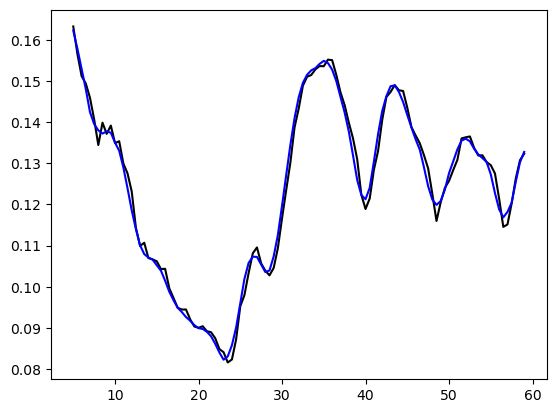

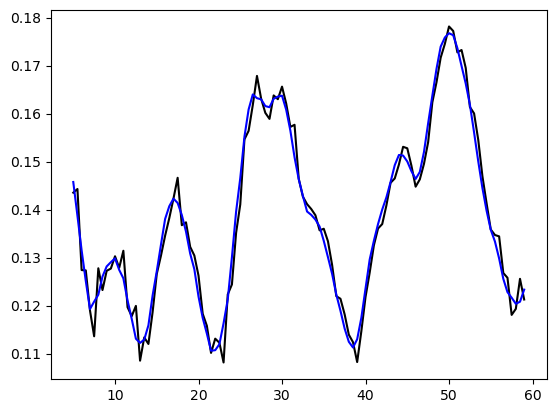

In [5]:
df_mpc = pd.read_csv("/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_MPC_Aug18_23.csv")

time_arr_mpc_raw = df_mpc["time"].to_numpy() - df_mpc["time"].to_numpy()[0]
mu_arr_mpc_raw = df_mpc["mu"].to_numpy()
pulse_arr_mpc_raw = df_mpc["u"].to_numpy()

time_arr_mpc_raw = time_arr_mpc_raw[1:]
mu_arr_mpc_raw = mu_arr_mpc_raw[1:]
pulse_arr_mpc_raw = pulse_arr_mpc_raw[1:]

time_arr_mpc = np.arange(0, time_arr_mpc_raw[-1], 0.5)
mu_arr_mpc_unsmooth = np.interp(time_arr_mpc, time_arr_mpc_raw, mu_arr_mpc_raw)
pulse_arr_mpc_unsmooth = np.interp(time_arr_mpc, time_arr_mpc_raw, pulse_arr_mpc_raw)

cutoff = 10
time_arr_mpc = time_arr_mpc[cutoff:]
mu_arr_mpc_unsmooth = mu_arr_mpc_unsmooth[cutoff:]
pulse_arr_mpc_unsmooth = pulse_arr_mpc_unsmooth[cutoff:]

# smooth data with savgol filter
mu_arr_mpc = savgol_filter(mu_arr_mpc_unsmooth, 8, 3, deriv=0)
pulse_arr_mpc = savgol_filter(pulse_arr_mpc_unsmooth, 8, 3, deriv=0)


df_mpc2 = pd.read_csv("/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_MPC_Aug18_23_2.csv")

time_arr_mpc_raw = df_mpc2["time"].to_numpy() - df_mpc2["time"].to_numpy()[0]
mu_arr_mpc_raw = df_mpc2["mu"].to_numpy()
pulse_arr_mpc_raw = df_mpc2["u"].to_numpy()

time_arr_mpc_raw = time_arr_mpc_raw[1:]
mu_arr_mpc_raw = mu_arr_mpc_raw[1:]
pulse_arr_mpc_raw = pulse_arr_mpc_raw[1:]

time_arr_mpc2 = np.arange(0, time_arr_mpc_raw[-1], 0.5)
mu_arr_mpc2_unsmooth = np.interp(time_arr_mpc2, time_arr_mpc_raw, mu_arr_mpc_raw)
pulse_arr_mpc2_unsmooth = np.interp(time_arr_mpc2, time_arr_mpc_raw, pulse_arr_mpc_raw)

cutoff = 10
time_arr_mpc2 = time_arr_mpc2[cutoff:]
mu_arr_mpc2_unsmooth = mu_arr_mpc2_unsmooth[cutoff:]
pulse_arr_mpc2_unsmooth = pulse_arr_mpc2_unsmooth[cutoff:]

# smooth data with savgol filter
mu_arr_mpc2 = savgol_filter(mu_arr_mpc2_unsmooth, 8, 3, deriv=0)
pulse_arr_mpc2 = pulse_arr_mpc2_unsmooth

# plot smoothed data
plt.figure()
plt.plot(time_arr_mpc, mu_arr_mpc_unsmooth, label="MPC", color="black")
plt.plot(time_arr_mpc, mu_arr_mpc, label="MPC", color="blue")

plt.figure()
plt.plot(time_arr_mpc2, mu_arr_mpc2_unsmooth, label="MPC2", color="black")
plt.plot(time_arr_mpc2, mu_arr_mpc2, label="MPC2", color="blue")

In [6]:
def processData(time_array, mu_array, pulse_array, embed_dim=10, step_pred=1):
    mu = []
    L = []
    mu_next = []
    if len(time_array)-step_pred < embed_dim:
        step_pred = len(time_array)-embed_dim-1
    for i in range(embed_dim, len(time_array)-step_pred):
        mu.append(mu_array[i-embed_dim:i])
        L.append(pulse_array[i-embed_dim:i+step_pred])
        mu_next_add = []
        for j in range(0, step_pred):
            mu_next_add.append(mu_array[i+j])
        mu_next.append(mu_next_add)
    mu = np.array(mu)
    L = np.array(L)
    mu_next = np.array(mu_next)

    return mu, L, mu_next


In [7]:
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'

# Multilayer Perceptron
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, device):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.SiLU()
        self.hidden_layers = torch.nn.ModuleList()
        for _ in range(self.num_layers-1):
            self.hidden_layers.append(torch.nn.Linear(self.hidden_size, self.hidden_size))
        self.fc2 = torch.nn.Linear(self.hidden_size, self.output_size)
        self.output = torch.nn.Linear(self.output_size, self.output_size)
        self.device = device

    def iterate(self, mu, L):
        x = torch.cat((mu/0.2, L/0.1), dim=-1)
        out = self.fc1(x)
        out = self.relu(out)
        for i in range(self.num_layers-1):
            out = self.hidden_layers[i](out)
            out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.output(out)
        out = mu[..., [-1]] + out

        return out
    
    def forward(self, mu, L, mu_next):
        num_pred = mu_next.shape[-1]
        embed_dim = mu.shape[-1]
        mu_augmented = torch.zeros((mu.shape[0], mu.shape[1] + num_pred)).to(self.device)
        mu_augmented[:, :embed_dim] = mu

        for i in range(num_pred):
            mu_out = self.iterate(mu_augmented[:, i:i+embed_dim], 
                                 L[:, i:i+embed_dim])
            mu_augmented[:, [i+embed_dim]] = mu_out

        return mu_augmented[:, embed_dim:]

In [8]:
embed_dim = 10
step_pred = 10

mu_pid, L_pid, mu_next_pid = processData(time_arr_pid, mu_arr_pid, pulse_arr_pid, embed_dim=embed_dim, step_pred=step_pred)
mu_mpc, L_mpc, mu_next_mpc = processData(time_arr_mpc, mu_arr_mpc, pulse_arr_mpc, embed_dim=embed_dim, step_pred=step_pred)
mu_multisetpoint, L_multisetpoint, mu_next_multisetpoint = processData(time_arr_multisetpoint, mu_arr_multisetpoint, L_arr_multisetpoint, embed_dim=embed_dim, step_pred=step_pred)
mu_actdeact, L_actdeact, mu_next_actdeact = processData(time_arr_actdeact, mu_arr_actdeact, L_arr_actdeact, embed_dim=embed_dim, step_pred=step_pred)

mu_train = torch.tensor(np.concatenate((mu_pid, mu_mpc, mu_multisetpoint, mu_actdeact), axis=0)).float().to(device)
L_train = torch.tensor(np.concatenate((L_pid, L_mpc, L_multisetpoint, L_actdeact), axis=0)).float().to(device)
mu_next_train = torch.tensor(np.concatenate((mu_next_pid, mu_next_mpc, mu_next_multisetpoint, mu_next_actdeact), axis=0)).float().to(device)

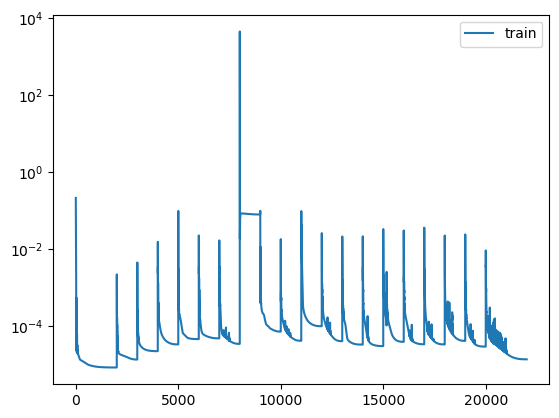

In [9]:
import tqdm
torch.random.manual_seed(123)

# Hyper-parameters
embed_dim = 10
input_size = embed_dim * 2
hidden_size = 32
num_layers = 4

model = MLP(input_size, hidden_size, num_layers, 1, device).to(device)
lr = 0.01

# Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

# learning rate scheduler



# Train the model
num_epochs = 1000
batch_size = 1000

train_loss = []

step_pred_arr = 20

epoch_arr = np.ones((step_pred_arr)) * num_epochs
epoch_arr[0] = 2000
epoch_arr[-1] = 2000

for step_pred in range(1, step_pred_arr+1):
    mu_pid, L_pid, mu_next_pid = processData(time_arr_pid, mu_arr_pid, pulse_arr_pid, embed_dim=embed_dim, step_pred=step_pred)
    mu_mpc, L_mpc, mu_next_mpc = processData(time_arr_mpc, mu_arr_mpc, pulse_arr_mpc, embed_dim=embed_dim, step_pred=step_pred)
    mu_multisetpoint, L_multisetpoint, mu_next_multisetpoint = processData(time_arr_multisetpoint, mu_arr_multisetpoint, L_arr_multisetpoint, embed_dim=embed_dim, step_pred=step_pred)
    mu_actdeact, L_actdeact, mu_next_actdeact = processData(time_arr_actdeact, mu_arr_actdeact, L_arr_actdeact, embed_dim=embed_dim, step_pred=step_pred)
    mu_pid2, L_pid2, mu_next_pid2 = processData(time_arr_pid2, mu_arr_pid2, pulse_arr_pid2, embed_dim=embed_dim, step_pred=step_pred)
    mu_mpc2, L_mpc2, mu_next_mpc2 = processData(time_arr_mpc2, mu_arr_mpc2, pulse_arr_mpc2, embed_dim=embed_dim, step_pred=step_pred)

    mu_train = torch.tensor(np.concatenate((mu_pid, mu_pid2, mu_multisetpoint, mu_mpc, mu_mpc2, mu_actdeact), axis=0)).float().to(device)
    L_train = torch.tensor(np.concatenate((L_pid, L_pid2, L_multisetpoint, L_mpc, L_mpc2, L_actdeact), axis=0)).float().to(device)
    mu_next_train = torch.tensor(np.concatenate((mu_next_pid, mu_next_pid2, mu_next_multisetpoint, mu_next_mpc, mu_next_mpc2, mu_next_actdeact), axis=0)).float().to(device)

    # Define data loaders
    train_dataset = torch.utils.data.TensorDataset(mu_train, L_train, mu_next_train)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                  batch_size=batch_size,
                                                    shuffle=True)

    # optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-3)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=int(epoch_arr[step_pred-1]), eta_min=1e-6)
    
    for epoch in tqdm.tqdm(range(int(epoch_arr[step_pred-1])), leave=False, desc="Step Pred: {} Train Loss: {}".format(step_pred, train_loss[-1] if len(train_loss) > 0 else 0)):
        train_loss_arr = []
        for mu_train, L_train, mu_next_train in train_loader:
            mu_train = mu_train.to(device)
            L_train = L_train.to(device)
            mu_next_train = mu_next_train.to(device)
            # Forward pass
            outputs = model(mu_train, L_train, mu_next_train)
            loss = criterion(outputs, mu_next_train)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

            train_loss_arr.append(loss.item())
        train_loss.append(np.mean(train_loss_arr))
        
        # if (epoch+1) % 100 == 0:
        #     print ('Epoch [{}/{}], Loss: {:.6e}' 
        #            .format(epoch+1, num_epochs, loss.item()))
    # print(train_loss[-1])
    
# Plot the loss
plt.semilogy(train_loss, label='train')
plt.legend()

In [10]:
step_pred = 10

mu_pid, L_pid, mu_next_pid = processData(time_arr_pid, mu_arr_pid, pulse_arr_pid, embed_dim=embed_dim, step_pred=step_pred)
mu_mpc, L_mpc, mu_next_mpc = processData(time_arr_mpc, mu_arr_mpc, pulse_arr_mpc, embed_dim=embed_dim, step_pred=step_pred)
mu_multisetpoint, L_multisetpoint, mu_next_multisetpoint = processData(time_arr_multisetpoint, mu_arr_multisetpoint, L_arr_multisetpoint, embed_dim=embed_dim, step_pred=step_pred)
mu_actdeact, L_actdeact, mu_next_actdeact = processData(time_arr_actdeact, mu_arr_actdeact, L_arr_actdeact, embed_dim=embed_dim, step_pred=step_pred)

mu_pid2, L_pid2, mu_next_pid2 = processData(time_arr_pid2, mu_arr_pid2, pulse_arr_pid2, embed_dim=embed_dim, step_pred=step_pred)
mu_mpc2, L_mpc2, mu_next_mpc2 = processData(time_arr_mpc2, mu_arr_mpc2, pulse_arr_mpc2, embed_dim=embed_dim, step_pred=step_pred)

mu_train = torch.tensor(np.concatenate((mu_pid, mu_mpc, mu_multisetpoint, mu_actdeact), axis=0)).float().to(device)
L_train = torch.tensor(np.concatenate((L_pid, L_mpc, L_multisetpoint, L_actdeact), axis=0)).float().to(device)
mu_next_train = torch.tensor(np.concatenate((mu_next_pid, mu_next_mpc, mu_next_multisetpoint, mu_next_actdeact), axis=0)).float().to(device)

mu_test = torch.tensor(np.concatenate((mu_pid2, mu_mpc2), axis=0)).float().to(device)
L_test = torch.tensor(np.concatenate((L_pid2, L_mpc2), axis=0)).float().to(device)
mu_next_test = torch.tensor(np.concatenate((mu_next_pid2, mu_next_mpc2), axis=0)).float().to(device)

print(mu_train.shape)
print(L_train.shape)
print(mu_next_train.shape)

torch.Size([561, 10])
torch.Size([561, 20])
torch.Size([561, 10])


(561, 10)


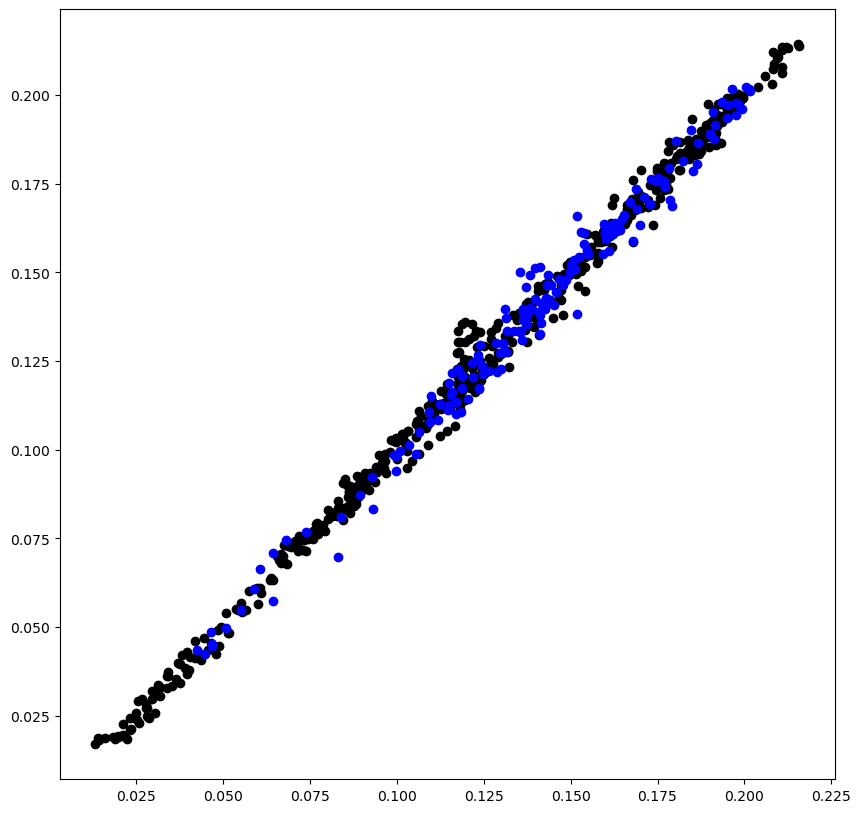

In [11]:
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()
mu_test_pred = model(mu_test, L_test, mu_next_test).detach().cpu().numpy()

print(mu_train_pred.shape)
index = -1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(mu_train_pred[:,index].flatten(), mu_next_train[:,index].detach().cpu().numpy().flatten(), 'ok', label='train')
ax.plot(mu_test_pred[:,index].flatten(), mu_next_test[:,index].detach().cpu().numpy().flatten(), 'ob', label='test')

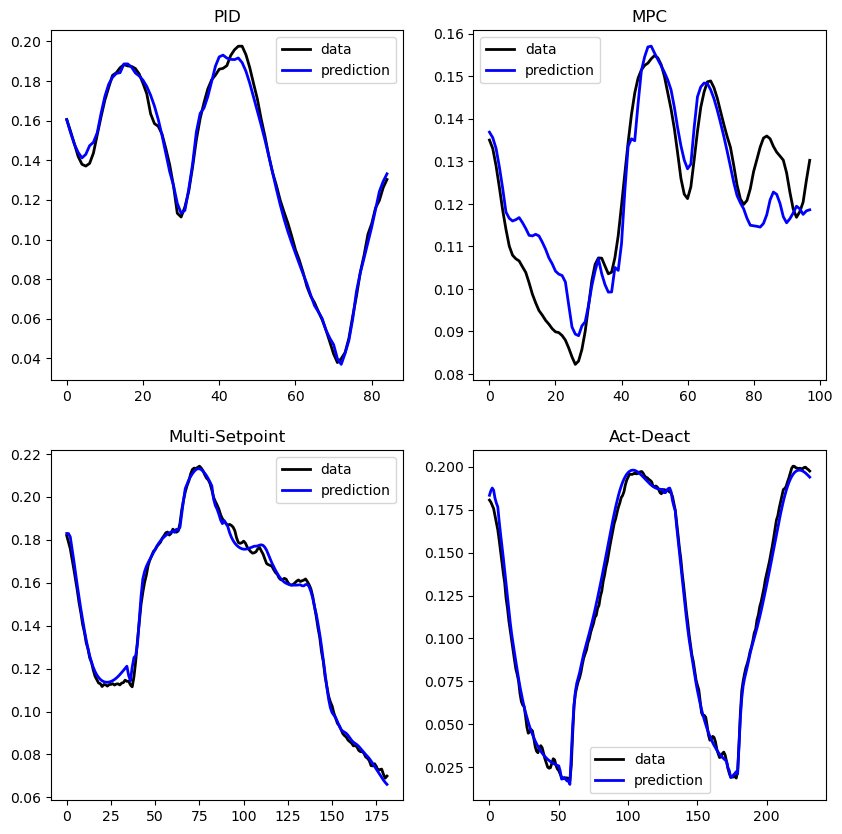

In [12]:
# Training Data Viz

step_pred = 1000

fig = plt.figure(figsize=(10, 10))

mu_pid, L_pid, mu_next_pid = processData(time_arr_pid, mu_arr_pid, pulse_arr_pid, embed_dim=embed_dim, step_pred=step_pred)
mu_mpc, L_mpc, mu_next_mpc = processData(time_arr_mpc, mu_arr_mpc, pulse_arr_mpc, embed_dim=embed_dim, step_pred=step_pred)
mu_multisetpoint, L_multisetpoint, mu_next_multisetpoint = processData(time_arr_multisetpoint, mu_arr_multisetpoint, L_arr_multisetpoint, embed_dim=embed_dim, step_pred=step_pred)
mu_actdeact, L_actdeact, mu_next_actdeact = processData(time_arr_actdeact, mu_arr_actdeact, L_arr_actdeact, embed_dim=embed_dim, step_pred=step_pred)

mu_train = torch.tensor(mu_pid).float().to(device)
L_train = torch.tensor(L_pid).float().to(device)
mu_next_train = torch.tensor(mu_next_pid).float().to(device)
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()

ax = fig.add_subplot(221)
ax.plot(mu_next_train.detach().cpu().numpy().flatten(), label='data', linewidth=2, color='black')
ax.plot(mu_train_pred.flatten(), label='prediction', linewidth=2, color='blue')
ax.legend()
ax.title.set_text('PID')

mu_train = torch.tensor(mu_mpc).float().to(device)
L_train = torch.tensor(L_mpc).float().to(device)
mu_next_train = torch.tensor(mu_next_mpc).float().to(device)
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()

ax = fig.add_subplot(222)
ax.plot(mu_next_train.detach().cpu().numpy().flatten(), label='data', linewidth=2, color='black')
ax.plot(mu_train_pred.flatten(), label='prediction', linewidth=2, color='blue')
ax.legend()
ax.title.set_text('MPC')

mu_train = torch.tensor(mu_multisetpoint).float().to(device)
L_train = torch.tensor(L_multisetpoint).float().to(device)
mu_next_train = torch.tensor(mu_next_multisetpoint).float().to(device)
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()

ax = fig.add_subplot(223)
ax.plot(mu_next_train.detach().cpu().numpy().flatten(), label='data', linewidth=2, color='black')
ax.plot(mu_train_pred.flatten(), label='prediction', linewidth=2, color='blue')
ax.legend()
ax.title.set_text('Multi-Setpoint')

mu_train = torch.tensor(mu_actdeact).float().to(device)
L_train = torch.tensor(L_actdeact).float().to(device)
mu_next_train = torch.tensor(mu_next_actdeact).float().to(device)
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()

ax = fig.add_subplot(224)
ax.plot(mu_next_train.detach().cpu().numpy().flatten(), label='data', linewidth=2, color='black')
ax.plot(mu_train_pred.flatten(), label='prediction', linewidth=2, color='blue')
ax.legend()
ax.title.set_text('Act-Deact')

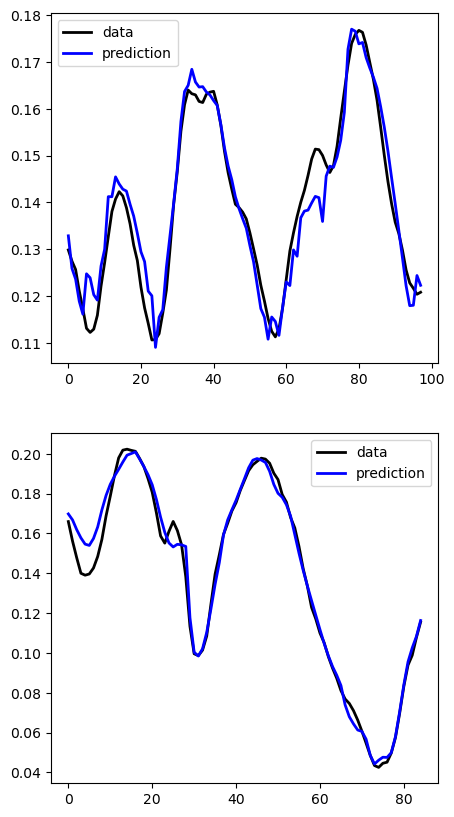

In [13]:
# Test Data Viz

step_pred = 1000

fig = plt.figure(figsize=(5, 10))

mu_mpc2, L_mpc2, mu_next_mpc2 = processData(time_arr_mpc2, mu_arr_mpc2, pulse_arr_mpc2, embed_dim=embed_dim, step_pred=step_pred)


mu_train = torch.tensor(mu_mpc2).float().to(device)
L_train = torch.tensor(L_mpc2).float().to(device)
mu_next_train = torch.tensor(mu_next_mpc2).float().to(device)
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()

ax = fig.add_subplot(211)
ax.plot(mu_next_train.detach().cpu().numpy().flatten(), label='data', linewidth=2, color='black')
ax.plot(mu_train_pred.flatten(), label='prediction', linewidth=2, color='blue')
ax.legend()

mu_pid2, L_pid2, mu_next_pid2 = processData(time_arr_pid2, mu_arr_pid2, pulse_arr_pid2, embed_dim=embed_dim, step_pred=step_pred)

mu_train = torch.tensor(mu_pid2).float().to(device)
L_train = torch.tensor(L_pid2).float().to(device)
mu_next_train = torch.tensor(mu_next_pid2).float().to(device)
mu_train_pred = model(mu_train, L_train, mu_next_train).detach().cpu().numpy()

ax = fig.add_subplot(212)
ax.plot(mu_next_train.detach().cpu().numpy().flatten(), label='data', linewidth=2, color='black')
ax.plot(mu_train_pred.flatten(), label='prediction', linewidth=2, color='blue')
ax.legend()

